In [1]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

In [3]:
# Contar el número de valores faltantes en cada columna de las características
missing_values_features = X.isnull().sum()

# Mostrar el conteo de valores faltantes por columna
print("Valores faltantes en las características (X):")
print(missing_values_features)

Valores faltantes en las características (X):
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


In [4]:
# Contar valores 
missing_values_targets = y.isnull().sum()

# Mostrar el conteo de valores faltantes
print("Valores faltantes en los objetivos (y):")
print(missing_values_targets)


Valores faltantes en los objetivos (y):
Diagnosis    0
dtype: int64


In [5]:
pip install scikit-learn pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
#Paso 1: Preparación del Entorno

In [7]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
#Carga de datos y division de variables

In [9]:
data = load_breast_cancer()
X = data.data
y = data.target

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
#Entrenamiento de los Modelos

In [11]:
# Inicializar los modelos
log_reg = LogisticRegression(max_iter=10000, random_state=42)
rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
svm_model = SVC(probability=True, random_state=42)

# Entrenar los modelos
log_reg.fit(X_train, y_train)
rand_forest.fit(X_train, y_train)
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [12]:
#Evaluación de los Modelos

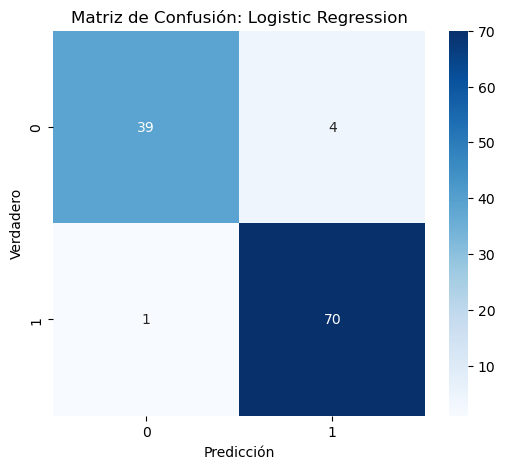

Informe de Clasificación: Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



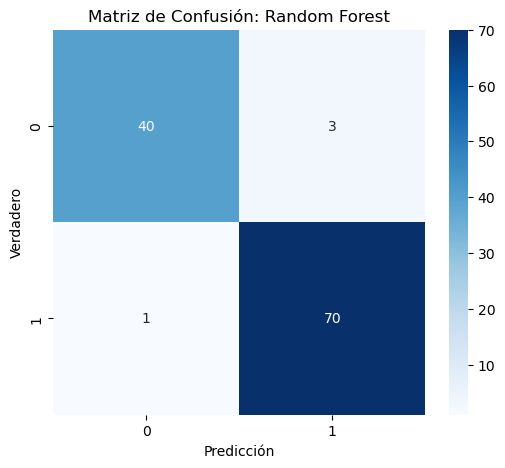

Informe de Clasificación: Random Forest

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



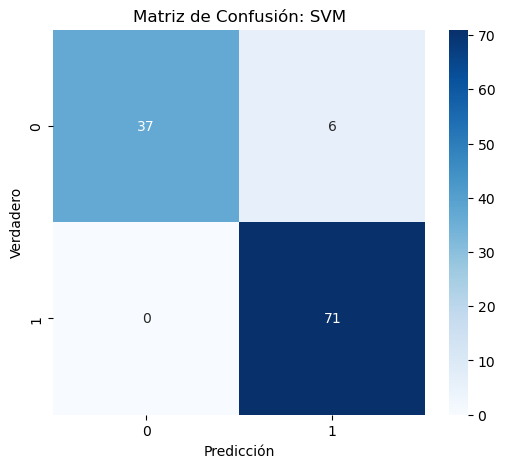

Informe de Clasificación: SVM

              precision    recall  f1-score   support

           0       1.00      0.86      0.92        43
           1       0.92      1.00      0.96        71

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [13]:
models = {'Logistic Regression': log_reg, 'Random Forest': rand_forest, 'SVM': svm_model}
for name, model in models.items():
    # Predicciones
    y_pred = model.predict(X_test)
    
    # Matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Matriz de Confusión: {name}')
    plt.ylabel('Verdadero')
    plt.xlabel('Predicción')
    plt.show()
    
    # Informe de clasificación
    print(f'Informe de Clasificación: {name}\n')
    print(classification_report(y_test, y_pred))

In [14]:
#Ahora probaremos cada modelo

In [ ]:
#Prueba 1: elegimos 5 opciones aleatorias y comparamos la probabilidad con el resultado real.

In [16]:
import numpy as np

# Seleccionar 5 índices aleatorios sin reemplazo del conjunto de prueba
random_indices = np.random.choice(X_test.shape[0], 5, replace=False)

# Usando los mismos índices aleatorios para verificar las etiquetas reales
for index in random_indices:
    example_patient = X_test[index].reshape(1, -1)
    prob_log_reg = log_reg.predict_proba(example_patient)[0][1]
    prob_rand_forest = rand_forest.predict_proba(example_patient)[0][1]
    prob_svm = svm_model.predict_proba(example_patient)[0][1]
    real_label = y_test[index]
    
    # Imprimir las probabilidades predichas y la etiqueta real
    print(f"Paciente {index}:")
    print(f"Probabilidad de cáncer según la Regresión Logística: {prob_log_reg:.2f}")
    print(f"Probabilidad de cáncer según el Random Forest: {prob_rand_forest:.2f}")
    print(f"Probabilidad de cáncer según el SVM: {prob_svm:.2f}")
    print(f"Etiqueta real: {'Cáncer' if real_label == 1 else 'No cáncer'}\n")


Paciente 90:
Probabilidad de cáncer según la Regresión Logística: 0.99
Probabilidad de cáncer según el Random Forest: 0.99
Probabilidad de cáncer según el SVM: 0.94
Etiqueta real: Cáncer

Paciente 33:
Probabilidad de cáncer según la Regresión Logística: 0.99
Probabilidad de cáncer según el Random Forest: 0.98
Probabilidad de cáncer según el SVM: 0.71
Etiqueta real: Cáncer

Paciente 72:
Probabilidad de cáncer según la Regresión Logística: 1.00
Probabilidad de cáncer según el Random Forest: 0.99
Probabilidad de cáncer según el SVM: 0.90
Etiqueta real: Cáncer

Paciente 93:
Probabilidad de cáncer según la Regresión Logística: 1.00
Probabilidad de cáncer según el Random Forest: 0.92
Probabilidad de cáncer según el SVM: 0.97
Etiqueta real: Cáncer

Paciente 100:
Probabilidad de cáncer según la Regresión Logística: 0.00
Probabilidad de cáncer según el Random Forest: 0.09
Probabilidad de cáncer según el SVM: 0.00
Etiqueta real: No cáncer



In [ ]:
# Prueba 2 elegimos 5 pacientes con cancer y 5 sin cancer y comapramos

In [22]:
# Identificar índices de pacientes con cáncer (etiqueta 1) y sin cáncer (etiqueta 0)
indices_con_cancer = np.where(y_test == 1)[0]
indices_sin_cancer = np.where(y_test == 0)[0]

# Seleccionar 5 pacientes aleatorios con cáncer y 5 sin cáncer
np.random.seed(42)  # Para reproducibilidad
seleccionados_con_cancer = np.random.choice(indices_con_cancer, 5, replace=False)
seleccionados_sin_cancer = np.random.choice(indices_sin_cancer, 5, replace=False)

# Combinar los índices seleccionados para la predicción
indices_seleccionados = np.concatenate((seleccionados_con_cancer, seleccionados_sin_cancer))

# Realizar predicciones para los pacientes seleccionados
for index in indices_seleccionados:
    example_patient = X_test[index].reshape(1, -1)
    prob_log_reg = log_reg.predict_proba(example_patient)[0][1]
    prob_rand_forest = rand_forest.predict_proba(example_patient)[0][1]
    prob_svm = svm_model.predict_proba(example_patient)[0][1]
    real_label = "Cáncer" if y_test[index] == 1 else "No Cáncer"
    
    # Imprimir las probabilidades predichas y la etiqueta real
    print(f"Paciente {index}: {real_label}")
    print(f"  Probabilidad de cáncer según la Regresión Logística: {prob_log_reg:.2f}")
    print(f"  Probabilidad de cáncer según el Random Forest: {prob_rand_forest:.2f}")
    print(f"  Probabilidad de cáncer según el SVM: {prob_svm:.2f}\n")



Paciente 34: Cáncer
  Probabilidad de cáncer según la Regresión Logística: 1.00
  Probabilidad de cáncer según el Random Forest: 1.00
  Probabilidad de cáncer según el SVM: 0.98

Paciente 0: Cáncer
  Probabilidad de cáncer según la Regresión Logística: 0.88
  Probabilidad de cáncer según el Random Forest: 0.97
  Probabilidad de cáncer según el SVM: 0.85

Paciente 75: Cáncer
  Probabilidad de cáncer según la Regresión Logística: 1.00
  Probabilidad de cáncer según el Random Forest: 0.96
  Probabilidad de cáncer según el SVM: 0.91

Paciente 9: Cáncer
  Probabilidad de cáncer según la Regresión Logística: 0.99
  Probabilidad de cáncer según el Random Forest: 0.94
  Probabilidad de cáncer según el SVM: 0.85

Paciente 89: Cáncer
  Probabilidad de cáncer según la Regresión Logística: 1.00
  Probabilidad de cáncer según el Random Forest: 0.99
  Probabilidad de cáncer según el SVM: 0.94

Paciente 11: No Cáncer
  Probabilidad de cáncer según la Regresión Logística: 0.00
  Probabilidad de cáncer